# Problem 1

$ L(\theta) = \frac{1}{2n} \sum_{i = 1}^n (\theta^Tx_i - y_i)^2$

If we start with the line equation $ y = \theta_1 + \theta_2x + \varepsilon $, we want to find the values of $ \theta_1 $ and $ \theta_2 $ that minimize $ \varepsilon $. 

Thus $ \varepsilon = \theta_1 + \theta_2x - y  $

We want $ \frac{\sum_{i=1}^n ( \theta_1 + \theta_2x_i - y_i)^2}{n} $ where each $ x_i, y_i $ represents the x and y values of our data.  This is the average of the squared error.

$ \sum_{i=1}^n ( \theta_1 + \theta_2x_i + y_i)^2 $ can be rewritten as:

So grouping all of our data into matrices:

All $ x_i = \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix} $ 

All $ y_i = Y = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix} $ 

Prepending a column of ones to $ x_i $ matrix gives $ X = \begin{bmatrix} 1 & x_1 \\ 1 &x_2 \\ \vdots & \vdots \\ 1 & x_n \end{bmatrix} $


Let $ \theta = \begin{bmatrix} \theta_1 \\ \theta_2 \end{bmatrix} $

$ \theta^T = \begin{bmatrix} \theta_1 & \theta_2 \end{bmatrix} $

$ \begin{bmatrix} 1 & x_1 \\ 1 &x_2 \\ \vdots & \vdots \\ 1 & x_n \end{bmatrix} \begin{bmatrix} \theta_1 \\ \theta_2 \end{bmatrix}  - \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix} = \begin{bmatrix} \theta_1 + \theta_2x_1 - y_1 \\ \theta_1 + \theta_2x_1 - y_1 \\ \vdots \\ \theta_1 + \theta_2x_n - y_n \end{bmatrix} $ 

Which is a matrix representing $ \varepsilon_i $

$ \sum_{i=1}^n ( \theta_1 + \theta_2x_i - y_i)^2 = (X\theta - Y)^2 $

$ (X\theta - Y)^2 = (X\theta - Y)^T(X\theta - Y) = (\theta^TX^T - Y^T)(X\theta - Y) = \theta^TX^TX\theta - \theta^TX^TY - Y^TX\theta + Y^TY $

$ \frac{1}{n} (\theta^TX^TX\theta - \theta^TX^TY - Y^TX\theta + Y^TY) $

A $ 1 x 1 $ matrix equals its transpose so $ Y^TX\theta = (Y^TX\theta)^T= \theta^TX^TY $

So $ \frac{1}{n} (\theta^TX^TX\theta - \theta^TX^TY - Y^TX\theta + Y^TY) =  \frac{1}{n} (\theta^TX^TX\theta - 2\theta^TX^TY + Y^TY)$

Taking the partial with respect to $ \theta $ gives:

 $ \frac{1}{n} (2X^TX\theta - 2X^TY + 0) = \frac{2}{n} (X^TX\theta - X^TY) $

Setting equal to zero and solving (which is why dividing the MSE by 2 at the start doesn't change anything):

$ 0 = \frac{2}{n} (X^TX\theta - X^TY) $

$ X^TX\theta = X^TY $

$ \theta = (X^TX)^{-1}X^TY $

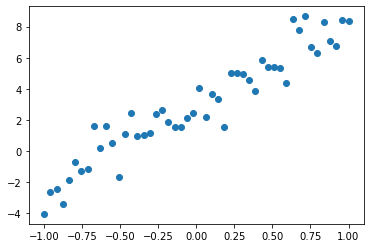

In [66]:
def f(x): return 5*x + 2 + np.random.normal(1,1, len(x))
x = np.linspace(-1, 1)
y = f(x)
y = y.reshape(-1, 1)
plt.scatter(x, y)
X = np.c_[np.ones((len(x), 1)), x]

In [70]:
def grad_desc(eta, iters):
    theta = np.random.normal(0, 1, (2, 1))
    for i in range(iters):
        grads = 2/len(x) * X.T @ (X @ theta - y)
        theta = theta - eta * grads
    return theta

In [78]:
grad_desc(0.1, 100)

array([[2.93526132],
       [5.41200578]])

In [79]:
grad_desc(0.1, 1000)

array([[2.93526132],
       [5.41610105]])

In [82]:
grad_desc(0.1, 10000)

array([[2.93526132],
       [5.41610105]])

In [83]:
grad_desc(0.1, 100000)

array([[2.93526132],
       [5.41610105]])

In [140]:
from random import randint
def stochastic_grad_desc(eta, iters):
    theta = np.random.normal(0, 1, (2, 1))
    for i in range(iters):
        random_index = randint(1,len(x) - 1)
        x_value = x[random_index]
        y_value = y[random_index]
        theta_1 = theta[0][0]
        theta_2 = theta[1][0]
        grad_1 = 2 * theta_1 * theta_2 + 2 * theta_2 ** 2 * x_value - 2 * theta_2 * y_value
        grad_2 = -2 * (theta_1 + theta_2 * x_value - y_value)
        theta[0][0] = theta_1 - eta * grad_1
        theta[1][0] = theta_2 - eta * grad_2
    print(theta)
        

In [141]:
stochastic_grad_desc(.1, 1)

[[-2.40466543]
 [ 0.98118876]]


Welp, I'm getting errors when I try to run this over many iterations which means I did something wrong and I don't have time to fix it.